In [1]:
import numpy as np
from flashbax.vault import Vault
import pickle
import seaborn as sns
import pandas as pd

In [2]:
def get_conditional_entropy(obses,states):
    
    vals, indices, counts = np.unique(obses,axis=1, return_inverse=True,return_counts=True)
    num_tot = states.shape[1]


    bucketed_stats = {}

    # vals must be more than a single value, since it's cast to tuples
    for i, idx in enumerate(indices):
        if counts[idx]>1:
            try:
                bucketed_stats[hash(tuple(np.array(vals[0,idx].flatten())))].append(hash(tuple(np.array(states[0,i,:]))))
            except:
                bucketed_stats[hash(tuple(np.array(vals[0,idx].flatten())))] = [hash(tuple(np.array(states[0,i,:])))]

    conditional_entropy_sum = 0

    for bucket in list(bucketed_stats.values()):
        num_obses = len(bucket)
        vals2, counts2  = np.unique(bucket, return_counts=True)
        if len(counts2)>1:
            for count in counts2:
                conditional_entropy_sum += count*np.log(count/num_obses)
    conditional_entropy_sum = conditional_entropy_sum/num_tot

    return -conditional_entropy_sum

In [3]:
rel_dir = "vaults/smac_v1/"

vault_name = "5m_vs_6m"
vault_uids=["Good","Medium","Poor","cfcql_Expert","cfcql_Medium","cfcql_Medium-Replay"]

new_vault_name = vault_name+'_120000.vlt'

cond_entropies = {}
for uid in vault_uids:
    vlt = Vault(rel_dir=rel_dir, vault_name=new_vault_name, vault_uid=uid)
    all_data = vlt.read()
    offline_data = all_data.experience
    del vlt
    del all_data

    cond_entropies[uid] = {}


    states = offline_data['infos']['state']

    for agent in range(offline_data['observations'].shape[2]):

        observations = offline_data['observations'][:,:,agent,:]

        cond_entropies[uid]['agent '+str(agent)] = get_conditional_entropy(observations,states)


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Good
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Poor
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Expert
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium-Replay


In [4]:
print(entropy_df)

NameError: name 'entropy_df' is not defined

<Axes: >

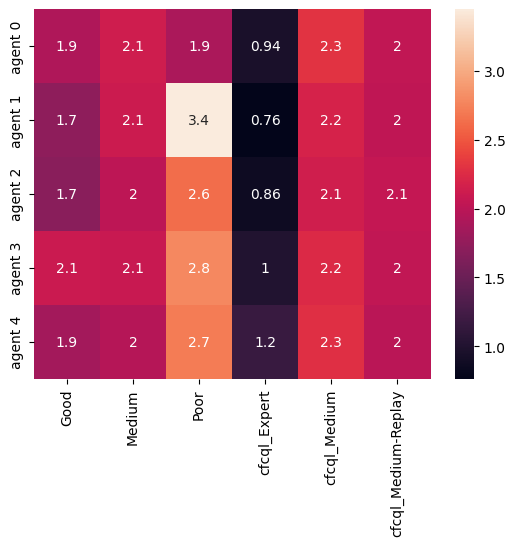

In [ ]:
entropy_df = pd.DataFrame(cond_entropies)
entropy_df.transpose

sns.heatmap(entropy_df,annot=True)

In [ ]:
rel_dir = "vaults/smac_v1/"

vault_name = "5m_vs_6m"
vault_uids=["Good","Medium","Poor","cfcql_Expert","cfcql_Medium","cfcql_Medium-Replay"]

new_vault_name = vault_name+'_120000.vlt'

cond_entropies_wactions = {}
for uid in vault_uids:
    vlt = Vault(rel_dir=rel_dir, vault_name=new_vault_name, vault_uid=uid)
    all_data = vlt.read()
    offline_data = all_data.experience
    del vlt
    del all_data

    cond_entropies_wactions[uid] = {}


    states = offline_data['infos']['state']

    reshaped_actions = offline_data["actions"].reshape((*offline_data["actions"].shape[:2],-1))
    state_pairs = np.concatenate((states,reshaped_actions),axis=-1)


    for agent in range(offline_data['observations'].shape[2]):

        observations = offline_data['observations'][:,:,agent,:]

        if len(offline_data["actions"].shape)==3:
            # expand the actions dimensions for easy adding
            actions = np.expand_dims(offline_data["actions"][:,:,agent],axis=-1)
        joint_obs_pairs = np.concatenate((observations,actions),axis=-1)

        cond_entropies_wactions[uid]['agent '+str(agent)] = get_conditional_entropy(joint_obs_pairs,state_pairs)

Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Good
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Poor
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Expert
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium-Replay


<Axes: >

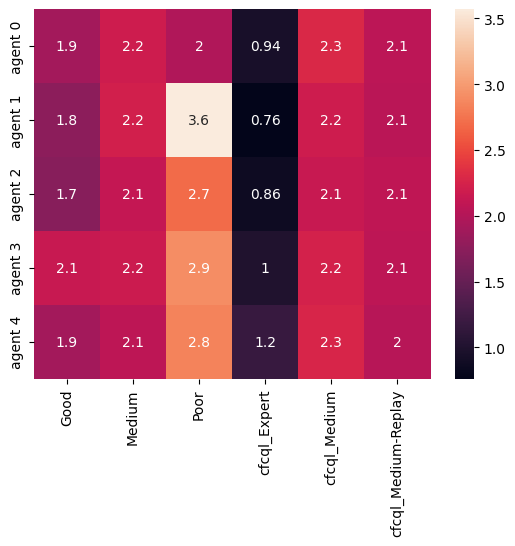

In [ ]:
entropy_wactions = pd.DataFrame(cond_entropies_wactions)
entropy_wactions.transpose

sns.heatmap(entropy_wactions,annot=True)

In [5]:
rel_dir = "vaults/smac_v1/"

vault_name = "5m_vs_6m"
vault_uids=["Good","Medium","Poor","cfcql_Expert","cfcql_Medium","cfcql_Medium-Replay"]

new_vault_name = vault_name+'_120000.vlt'

cond_entropies_wactions = {}
for uid in vault_uids:
    vlt = Vault(rel_dir=rel_dir, vault_name=new_vault_name, vault_uid=uid)
    all_data = vlt.read()
    offline_data = all_data.experience
    del vlt
    del all_data

    cond_entropies_wactions[uid] = {}


    states = offline_data['infos']['state']

    reshaped_actions = offline_data["actions"].reshape((*offline_data["actions"].shape[:2],-1))
    state_pairs = np.concatenate((states,reshaped_actions),axis=-1)


    for agent in range(offline_data['observations'].shape[2]):

        observations = offline_data['observations'][:,:,agent,:]

        if len(offline_data["actions"].shape)==3:
            # expand the actions dimensions for easy adding
            actions = np.expand_dims(offline_data["actions"][:,:,agent],axis=-1)
        joint_obs_pairs = np.concatenate((observations,actions),axis=-1)

        cond_entropies_wactions[uid]['agent '+str(agent)] = get_conditional_entropy(joint_obs_pairs,reshaped_actions)

Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Good
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Poor
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Expert
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium-Replay


<Axes: >

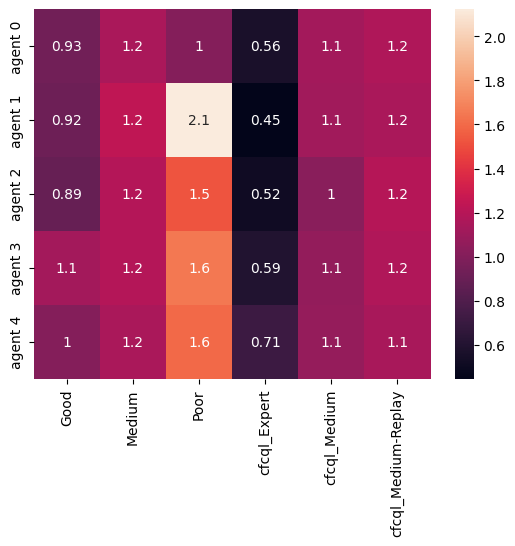

In [6]:
entropy_wactions = pd.DataFrame(cond_entropies_wactions)
entropy_wactions.transpose

sns.heatmap(entropy_wactions,annot=True)

In [ ]:
rel_dir = "vaults/smac_v1/"

vault_name = "5m_vs_6m"
vault_uids=["Good","Medium","Poor","cfcql_Expert","cfcql_Medium","cfcql_Medium-Replay"]

new_vault_name = vault_name+'_120000.vlt'

for uid in vault_uids:

    vlt = Vault(rel_dir=rel_dir, vault_name=new_vault_name, vault_uid=uid)
    all_data = vlt.read()
    offline_data = all_data.experience
    del vlt
    del all_data

    agent_id = 1

    observations = offline_data['observations'][:,:,agent_id,:]
    states = offline_data['infos']['state']

    vals, indices, counts = np.unique(observations,axis=1, return_inverse=True,return_counts=True)
    print(states.shape)

    num_tot = states.shape[1]


    bucketed_stats = {}

    # vals must be more than a single value, since it's cast to tuples
    for i, idx in enumerate(indices):
        if counts[idx]>1:
            try:
                bucketed_stats[tuple(vals[0,idx].flatten())].append(hash(tuple(np.array(states[0,i,:]))))
            except:
                bucketed_stats[tuple(vals[0,idx].flatten())] = [hash(tuple(np.array(states[0,i,:])))]

    conditional_entropy_sum = 0

    for bucket in list(bucketed_stats.values()):
        num_obses = len(bucket)
        vals2, counts2  = np.unique(bucket, return_counts=True)
        if len(counts2)>1:
            for count in counts2:
                conditional_entropy_sum += count*np.log(count/num_obses)
    conditional_entropy_sum = conditional_entropy_sum/num_tot
    print(conditional_entropy_sum)

Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Good
(1, 119974, 98)
-1.7215455778731148
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Medium
(1, 119986, 98)
-2.1111674003378327
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/Poor
(1, 119989, 98)
-3.44990091867415
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Expert
(1, 119974, 98)
-0.76323598567282
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium
(1, 119998, 98)
-2.184220954255195
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_120000.vlt/cfcql_Medium-Replay
(1, 118404, 98)
-2.024430234434622


In [ ]:
print(states.shape)

num_tot = states.shape[1]

(1, 19973, 98)


In [ ]:

bucketed_stats = {}

# vals must be more than a single value, since it's cast to tuples
for i, idx in enumerate(indices):
    if counts[idx]>1:
        try:
            bucketed_stats[tuple(vals[0,idx].flatten())].append(hash(tuple(np.array(states[0,i,:]))))
        except:
            bucketed_stats[tuple(vals[0,idx].flatten())] = [hash(tuple(np.array(states[0,i,:])))]
        

In [ ]:
print(list(bucketed_stats.values())[1])

[-1224008071294709459, 3704033686199611636, 4923318631337324777, 2008290752212253869, -4588266241674660534, -751769573988407448, -7793978655522439420, 4625854225359142064, -2673797676422273443, 59389324849524861, 4625854225359142064, -3989983651697046367, -6038154367026860014, 2008290752212253869, 4474457362768033379, 7052519603140917917, -5358147000829129098, -7793978655522439420, -4134973999221374780, -5604931209588971911, 4709493660792372271, -3433551560090354666, -3497961702045968622, -751769573988407448, -4872363778237946232, 4709493660792372271, -4588266241674660534, 3704033686199611636, -5741457885202362102, -6038154367026860014, -250270232317660454, -7644304566575457860, 59389324849524861, -4872363778237946232, 4625854225359142064, -4872363778237946232, 4923318631337324777, 3704033686199611636, 7052519603140917917, -751769573988407448, 4474457362768033379, -5741457885202362102, 2008290752212253869, 4277008915275053695, -1224008071294709459, -4134973999221374780, -77939786555224

In [ ]:
conditional_entropy_sum = 0

for bucket in list(bucketed_stats.values()):
    num_obses = len(bucket)
    vals2, counts2  = np.unique(bucket, return_counts=True)
    if len(counts2)>1:
        for count in counts2:
            conditional_entropy_sum += count*np.log(count/num_obses)
conditional_entropy_sum = conditional_entropy_sum/num_tot
print(conditional_entropy_sum)

-1.524141002857734
